In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np

In [ ]:
data=pd.read_csv("/content/data_final preprocessed_cdms.csv")
data

,cat__Varicella_1,cat__Varicella_2,cat__Mono or polysymptomatic_2,cat__Oligoclonal bands_0,cat__Oligoclonal bands_1,cat__Oligoclonal bands_2,cat__initial EDSS_1.0,cat__initial EDSS_2.0,cat__initial symptom_1.0,cat__initial symptom_2.0,...,cat__initial symptom_nan,cat__ final EDSS_1.0,cat__ final EDSS_2.0,remainder__Gender,remainder__LLSSEP,remainder__VEP,remainder__BAEP,remainder__Periventricular MRI,remainder__Infratentorial MRI,remainder__group
0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,1,1,0,0,0,0,1
1,0,1,1,0,1,0,0,1,0,0,...,0,0,1,1,1,1,0,0,0,1
2,1,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
4,1,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0,0,1,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
268,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
269,0,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
270,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,1,1,0,1,1,0


In [ ]:
!pip install feyn
import feyn

In [ ]:
from sklearn.model_selection import train_test_split
target='remainder__group'
train, test = train_test_split(data, test_size=0.2, stratify=data[target], random_state=42)

In [ ]:
# !pip install --upgrade imbalanced-learn
from imblearn.over_sampling import BorderlineSMOTE
Borderline = BorderlineSMOTE(random_state=42)

# Separate features (X) and target (y) from the training data
X_train = train.drop(columns=[target])
y_train = train[target]

# Resample the training data
X_train_res, y_train_res = Borderline.fit_resample(X_train, y_train)

# Combine the resampled features and target back into a single DataFrame
train_res = pd.concat([X_train_res, y_train_res], axis=1)


In [ ]:
# Connecting
ql = feyn.QLattice()
stypes = {}
for f in data.columns:
    if data[f].dtype =='object':
        stypes[f] = 'c'

# Reset and set random seed
# ql.reset(random_seed=42)

# Sample and fit models
models = ql.auto_run(
    data=train_res,
    output_name=target,
    kind='classification',
    stypes=stypes,
    n_epochs=30
    )

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="248.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 981 248.0" width="981" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="155.0" width="711" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="601" y="50.0"><title>remainder__group
logistic:
w=1.6167
bias=-0.5730</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="646.0" y="71.5">remainde..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="689" y="59.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="603" y="59.0">logistic</text><line stroke="#1E1E1E" x1="571" x2="601" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="481" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="59.0">1</text><line stroke="#1E1E1E" x1="451" x2="481" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="451" x2="481" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="361" y="20.0"><title>cat__ final EDSS_1.0
linear:
scale=2.000000
scale offset=0.846154
w=-2.232488
bias=0.3308</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="41.5">cat__ fi..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="29.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="363" y="29.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="80.0"><title>tanh</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="101.5">tanh</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="89.0">3</text><line stroke="#1E1E1E" x1="331" x2="361" y1="67.5" y2="97.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">4</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="97.5" y2="76.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="20.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="41.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="29.0">5</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="28.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="46.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>cat__Oligoclonal bands_1
linear:
scale=2.000000
scale offset=0.264957
w=1.793918
bias=0.3669</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" te
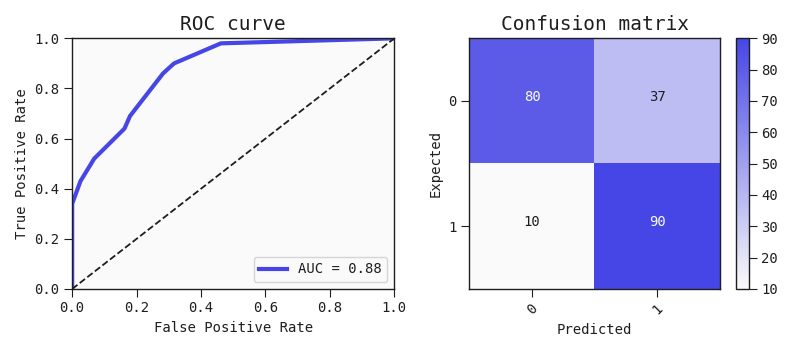
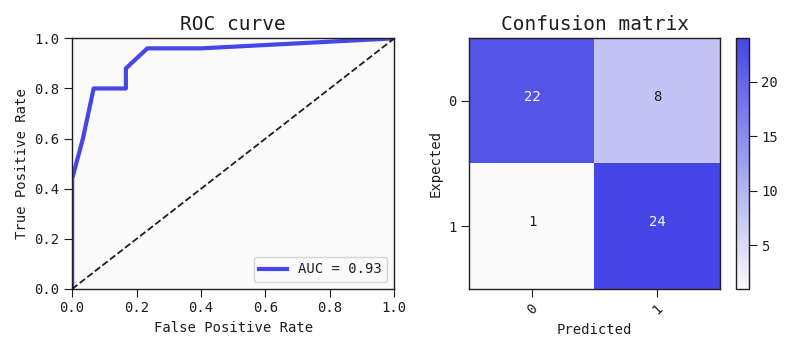

In [ ]:
best = models[0]
best.plot(train, test)

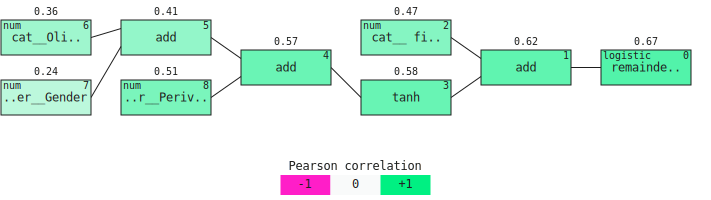

In [ ]:
best.plot_signal(train)